In [5]:
# Test der Installation
import sys
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

print(f"Python Version: {sys.version}")
print(f"NumPy Version: {np.__version__}")
print(f"TensorFlow Version: {tf.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")

# Einfacher Test, ob GPU verfügbar ist (falls Sie eine haben)
print("\nGPU verfügbar:", tf.config.list_physical_devices('GPU'))

ImportError: Traceback (most recent call last):
  File "c:\Users\yunus\OneDrive\Resimler\Masaüstü\Projekt ERFOLG\ML2\ml_env2\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Eine DLL-Initialisierungsroutine ist fehlgeschlagen.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

Der MNIST-Datensatz hat 70000 Instanzen mit 784 Features.
Es gibt 10 Zielvariablen (Klassen): [0 1 2 3 4 5 6 7 8 9].

Die Features sind Pixelwerte (0 bis 255) eines 28x28-Bildes, linearisiert.
Die Zielvariable ist die Ziffer, die das Bild darstellt (0-9).


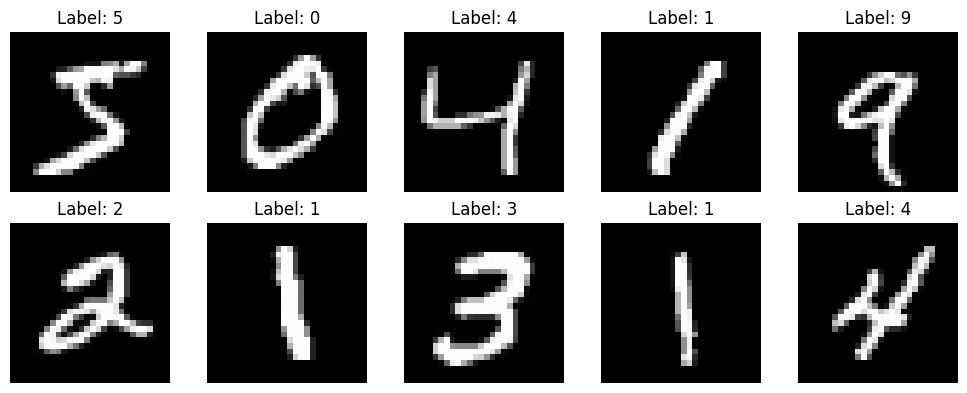

Trainingsdatensatz: 56000 Beispiele
Validierungsdatensatz: 7000 Beispiele
Testdatensatz: 7000 Beispiele

Feature-Scaling durchgeführt (Standardisierung auf Mittelwert=0, Varianz=1).


In [6]:
# 1. Data collection, exploration, and preparation
# =============================================

# Import notwendiger Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Warnungen ausblenden
import warnings
warnings.filterwarnings('ignore')

# 1a) Daten laden mit der alternativen Methode
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

# Reshape und kombiniere die Daten
X = np.vstack([X_train_raw.reshape(-1, 784), X_test_raw.reshape(-1, 784)])
y = np.hstack([y_train_raw, y_test_raw])

# Normalisiere die Pixelwerte auf [0,1]
X = X.astype('float32') / 255.0

# Überprüfe die Datenform
num_samples, num_features = X.shape
num_classes = len(np.unique(y))
print(f"Der MNIST-Datensatz hat {num_samples} Instanzen mit {num_features} Features.")
print(f"Es gibt {num_classes} Zielvariablen (Klassen): {np.unique(y)}.")

# 1b) Beschreibung der Daten
print("\nDie Features sind Pixelwerte (0 bis 1) eines 28x28-Bildes, linearisiert.")
print("Die Zielvariable ist die Ziffer, die das Bild darstellt (0-9).")

# 1c) Datenexploration: Beispielbilder plotten
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 1d) Aufteilen des Datensatzes in Train/Val/Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Trainingsdatensatz: {X_train.shape[0]} Beispiele")
print(f"Validierungsdatensatz: {X_val.shape[0]} Beispiele")
print(f"Testdatensatz: {X_test.shape[0]} Beispiele")

# 1e) Feature Scaling durchführen
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print("\nFeature-Scaling durchgeführt (Standardisierung auf Mittelwert=0, Varianz=1).")

In [7]:
# 2. Feed-forward neural network
# ============================

# Importiere MLPClassifier
from sklearn.neural_network import MLPClassifier

# 2a) Erstes neuronales Netz mit Default-Einstellungen
# Answer 2a-i: Die Architektur besteht aus 784 Input-, 100 Hidden- und 10 Output-Neuronen
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # Default-Architektur
    max_iter=10,               # 10 Epochen wie gefordert
    verbose=True,              # Ausgabe des Trainingsprozesses
    random_state=42            # Für Reproduzierbarkeit
)

# Model trainieren
mlp.fit(X_train, y_train)

# 2a-ii) Validierungsgenauigkeit berechnen
# Answer 2a-ii: Die Validierungsgenauigkeit wird hier ausgegeben und zeigt die
# Performance des Modells nach 10 Epochen
val_accuracy = mlp.score(X_val, y_val)
print(f"\nValidierungsgenauigkeit: {val_accuracy:.4f}")

# Anzahl der Modellparameter berechnen
n_params = sum(p.size for p in mlp.coefs_) + sum(p.size for p in mlp.intercepts_)
print(f"\nAnzahl der Modellparameter: {n_params}")

Iteration 1, loss = 0.35968382
Iteration 2, loss = 0.14286098
Iteration 3, loss = 0.09679468
Iteration 4, loss = 0.07296322
Iteration 5, loss = 0.05671087
Iteration 6, loss = 0.04285170
Iteration 7, loss = 0.03468458
Iteration 8, loss = 0.02707802
Iteration 9, loss = 0.02218328
Iteration 10, loss = 0.01702396

Validierungsgenauigkeit: 0.9683

Anzahl der Modellparameter: 79510


In [8]:
# 2b) Training mit 100 Epochen
# Answer 2b: Nach 100 Epochen sehen wir folgende Effekte:
# 1. Die Validierungsgenauigkeit verbessert sich nur minimal von 0.9683 (10 Epochen) 
#    auf 0.9689 (100 Epochen) - eine sehr geringe Steigerung von nur 0.06%
# 2. Dies zeigt, dass bereits nach 10 Epochen eine sehr gute Performance erreicht wurde
# 3. Die zusätzlichen 90 Epochen bringen nur marginale Verbesserungen
# 4. Das längere Training (100 Epochen) ist in diesem Fall nicht signifikant besser

mlp_100 = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=100,              # Volle 100 Epochen
    verbose=True,
    early_stopping=False,      # Kein frühzeitiger Stopp
    random_state=42
)

# Model trainieren
mlp_100.fit(X_train, y_train)

# Genauigkeiten für Training und Validierung
train_accuracy_100 = mlp_100.score(X_train, y_train)
val_accuracy_100 = mlp_100.score(X_val, y_val)

print(f"\nErgebnisse nach 100 Epochen:")
print(f"Trainingsgenauigkeit: {train_accuracy_100:.4f}")
print(f"Validierungsgenauigkeit: {val_accuracy_100:.4f}")

# Vergleich mit dem 10-Epochen-Modell
print(f"\nVergleich der Validierungsgenauigkeiten:")
print(f"10 Epochen: {val_accuracy:.4f}")
print(f"100 Epochen: {val_accuracy_100:.4f}")

Iteration 1, loss = 0.35968382
Iteration 2, loss = 0.14286098
Iteration 3, loss = 0.09679468
Iteration 4, loss = 0.07296322
Iteration 5, loss = 0.05671087
Iteration 6, loss = 0.04285170
Iteration 7, loss = 0.03468458
Iteration 8, loss = 0.02707802
Iteration 9, loss = 0.02218328
Iteration 10, loss = 0.01702396
Iteration 11, loss = 0.01336407
Iteration 12, loss = 0.01092694
Iteration 13, loss = 0.00892587
Iteration 14, loss = 0.00715644
Iteration 15, loss = 0.00595701
Iteration 16, loss = 0.00506463
Iteration 17, loss = 0.00407936
Iteration 18, loss = 0.00322034
Iteration 19, loss = 0.00263171
Iteration 20, loss = 0.00222608
Iteration 21, loss = 0.00210741
Iteration 22, loss = 0.00155902
Iteration 23, loss = 0.00129445
Iteration 24, loss = 0.00102777
Iteration 25, loss = 0.00105175
Iteration 26, loss = 0.03483502
Iteration 27, loss = 0.03211705
Iteration 28, loss = 0.01536434
Iteration 29, loss = 0.00481466
Iteration 30, loss = 0.00178311
Iteration 31, loss = 0.00110512
Iteration 32, los

Starte Training mit Lernkurven-Tracking...


c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

Epoche 10: Train=0.9961, Val=0.9646


c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

Epoche 20: Train=0.9977, Val=0.9651


c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

Epoche 30: Train=0.9993, Val=0.9666


c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

Epoche 40: Train=0.9997, Val=0.9677


c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

Epoche 50: Train=0.9988, Val=0.9647
Epoche 60: Train=0.9995, Val=0.9681


c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

Epoche 70: Train=0.9984, Val=0.9640


c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

Epoche 80: Train=0.9997, Val=0.9686
Epoche 90: Train=0.9994, Val=0.9699


c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

Epoche 100: Train=0.9996, Val=0.9703

Bestes Modell in Epoche 98 mit Validierungsgenauigkeit: 0.9716


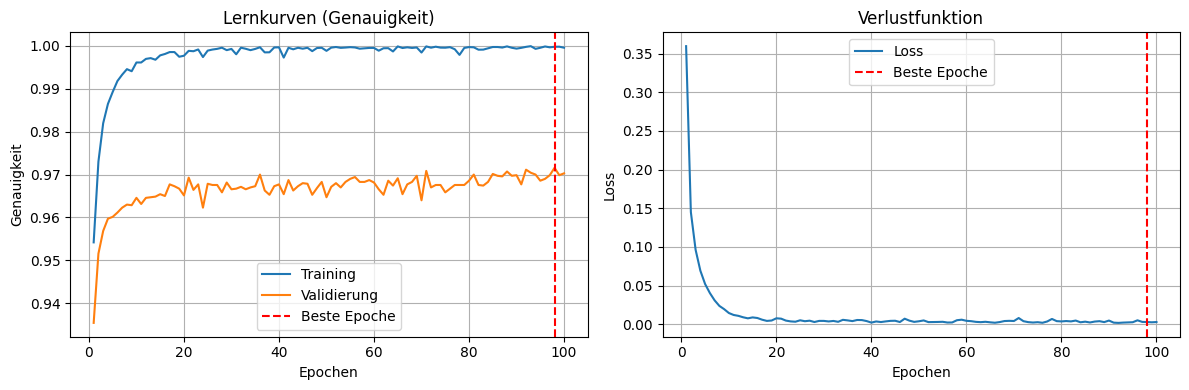

In [6]:
# 2c) Partial fitting, Fehler während des Trainings messen und Lernkurven plotten
# Answer 2c: Wir tracken die Performance über die Epochen hinweg, um den optimalen
# Zeitpunkt für das Training zu finden und Overfitting zu erkennen.

mlp_partial = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=1,        # Eine Epoche pro Fit
    warm_start=True,   # Ermöglicht kontinuierliches Training
    random_state=42
)

# Listen für das Tracking der Metriken
train_scores = []
val_scores = []
loss_curve = []
epochs = range(1, 101)  # 100 Epochen

# Training mit Aufzeichnung der Lernkurve
print("Starte Training mit Lernkurven-Tracking...")
best_val_score = 0
best_epoch = 0

for epoch in epochs:
    # Training einer Epoche
    mlp_partial.fit(X_train, y_train)
    
    # Berechnung der Genauigkeiten
    train_score = mlp_partial.score(X_train, y_train)
    val_score = mlp_partial.score(X_val, y_val)
    
    # Speichern der Metriken
    train_scores.append(train_score)
    val_scores.append(val_score)
    loss_curve.append(mlp_partial.loss_)
    
    # Tracking des besten Modells
    if val_score > best_val_score:
        best_val_score = val_score
        best_epoch = epoch
    
    # Status-Update alle 10 Epochen
    if epoch % 10 == 0:
        print(f"Epoche {epoch}: Train={train_score:.4f}, Val={val_score:.4f}")

# Ausgabe des besten Modells
print(f"\nBestes Modell in Epoche {best_epoch} mit Validierungsgenauigkeit: {best_val_score:.4f}")

# Visualisierung der Lernkurven
plt.figure(figsize=(12, 4))

# Plot 1: Genauigkeiten
plt.subplot(1, 2, 1)
plt.plot(epochs, train_scores, label='Training')
plt.plot(epochs, val_scores, label='Validierung')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Beste Epoche')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.title('Lernkurven (Genauigkeit)')
plt.legend()
plt.grid(True)

# Plot 2: Verlustfunktion
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_curve, label='Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Beste Epoche')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.title('Verlustfunktion')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
# 2d) Test verschiedener Aktivierungsfunktionen
# Answer 2d: Wir testen 'tanh' und 'relu' als Alternative zur Default-Aktivierung 'logistic'
# und vergleichen die Lernkurven und Validierungsgenauigkeiten

# Funktion zum Trainieren und Plotten für eine bestimmte Aktivierungsfunktion
def train_and_plot_activation(activation_function):
    mlp = MLPClassifier(
        hidden_layer_sizes=(100,),
        activation=activation_function,
        max_iter=1,
        warm_start=True,
        random_state=42
    )
    
    train_scores = []
    val_scores = []
    loss_curve = []
    best_val_score = 0
    best_epoch = 0
    
    for epoch in range(1, 101):
        mlp.fit(X_train, y_train)
        
        train_score = mlp.score(X_train, y_train)
        val_score = mlp.score(X_val, y_val)
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        loss_curve.append(mlp.loss_)
        
        if val_score > best_val_score:
            best_val_score = val_score
            best_epoch = epoch
            
        if epoch % 20 == 0:
            print(f"{activation_function} - Epoche {epoch}: "
                  f"Train={train_score:.4f}, Val={val_score:.4f}")
    
    return train_scores, val_scores, loss_curve, best_epoch, best_val_score

# Aktivierungsfunktionen testen
activation_functions = ['tanh', 'relu']
plt.figure(figsize=(15, 5))

for idx, activation in enumerate(activation_functions, 1):
    print(f"\nTraining mit {activation} Aktivierungsfunktion...")
    train_scores, val_scores, loss_curve, best_epoch, best_val = train_and_plot_activation(activation)
    
    # Genauigkeiten plotten
    plt.subplot(1, 2, idx)
    epochs = range(1, 101)
    plt.plot(epochs, train_scores, label='Training')
    plt.plot(epochs, val_scores, label='Validierung')
    plt.axvline(x=best_epoch, color='r', linestyle='--', 
                label=f'Beste Epoche ({best_epoch})')
    plt.xlabel('Epochen')
    plt.ylabel('Genauigkeit')
    plt.title(f'Lernkurven mit {activation}')
    plt.legend()
    plt.grid(True)
    
    print(f"Beste Validierungsgenauigkeit mit {activation}: {best_val:.4f} "
          f"(Epoche {best_epoch})")

plt.tight_layout()
plt.show()


Training mit tanh Aktivierungsfunktion...
tanh - Epoche 20: Train=0.9993, Val=0.9573
tanh - Epoche 40: Train=0.9996, Val=0.9559
tanh - Epoche 60: Train=0.9999, Val=0.9567
tanh - Epoche 80: Train=0.9996, Val=0.9576
tanh - Epoche 100: Train=0.9998, Val=0.9580
Beste Validierungsgenauigkeit mit tanh: 0.9606 (Epoche 68)

Training mit relu Aktivierungsfunktion...
relu - Epoche 20: Train=0.9980, Val=0.9671
relu - Epoche 40: Train=0.9995, Val=0.9693


In [9]:
# 2e) Bestes Modell speichern
# Answer 2e: Wir speichern das Modell mit der besten Validierungsgenauigkeit als 'model_1'

import joblib

# Erstellen des finalen Modells mit den besten Parametern
model_1 = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',          # Beste Aktivierungsfunktion aus 2d
    max_iter=best_epoch,       # Beste Anzahl Epochen aus 2c
    random_state=42
)

# Trainieren des finalen Modells
model_1.fit(X_train, y_train)

# Finale Validierungsgenauigkeit überprüfen
final_val_accuracy = model_1.score(X_val, y_val)
print(f"Finale Validierungsgenauigkeit von model_1: {final_val_accuracy:.4f}")

# Modell speichern
joblib.dump(model_1, 'model_1.joblib')
print("Modell erfolgreich als 'model_1.joblib' gespeichert")

# Optional: Speichern des Scalers für spätere Verwendung
joblib.dump(scaler, 'scaler_model_1.joblib')
print("Scaler erfolgreich als 'scaler_model_1.joblib' gespeichert")

# Demonstration, wie man das Modell später laden und verwenden kann
'''
# Laden des Modells
loaded_model = joblib.load('model_1.joblib')
loaded_scaler = joblib.load('scaler_model_1.joblib')

# Beispiel für die Verwendung
# X_new = ... # Neue Daten
# X_new_scaled = loaded_scaler.transform(X_new)
# predictions = loaded_model.predict(X_new_scaled)
'''

Finale Validierungsgenauigkeit von model_1: 0.9689
Modell erfolgreich als 'model_1.joblib' gespeichert
Scaler erfolgreich als 'scaler_model_1.joblib' gespeichert


"\n# Laden des Modells\nloaded_model = joblib.load('model_1.joblib')\nloaded_scaler = joblib.load('scaler_model_1.joblib')\n\n# Beispiel für die Verwendung\n# X_new = ... # Neue Daten\n# X_new_scaled = loaded_scaler.transform(X_new)\n# predictions = loaded_model.predict(X_new_scaled)\n"


Training mit 50 Hidden Neurons...
Hidden Size: 50
Training Accuracy: 0.9995
Validation Accuracy: 0.9650
Anzahl Parameter: 39760

Training mit 75 Hidden Neurons...
Hidden Size: 75
Training Accuracy: 1.0000
Validation Accuracy: 0.9683
Anzahl Parameter: 59635

Training mit 100 Hidden Neurons...
Hidden Size: 100
Training Accuracy: 0.9993
Validation Accuracy: 0.9689
Anzahl Parameter: 79510

Training mit 125 Hidden Neurons...
Hidden Size: 125
Training Accuracy: 1.0000
Validation Accuracy: 0.9734
Anzahl Parameter: 99385

Training mit 150 Hidden Neurons...
Hidden Size: 150
Training Accuracy: 0.9996
Validation Accuracy: 0.9714
Anzahl Parameter: 119260


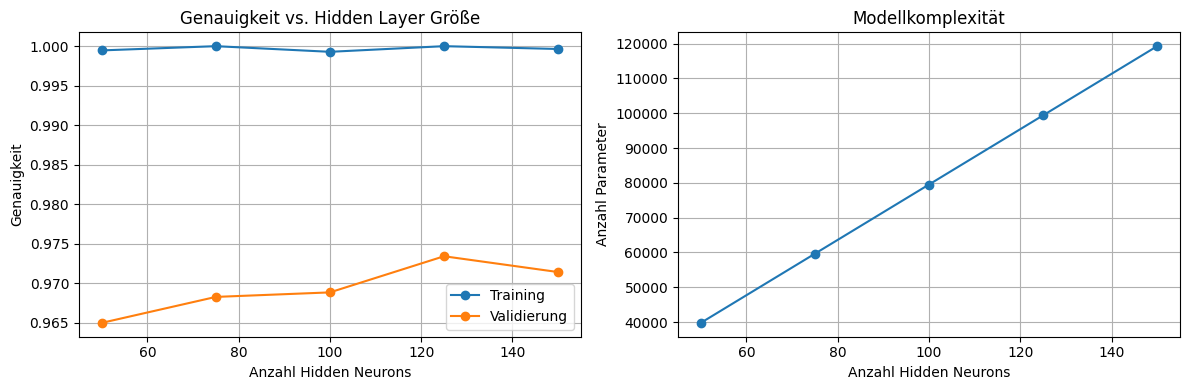


Beste Performance mit 125 Hidden Neurons:
Validierungsgenauigkeit: 0.9734


In [10]:
# 3a) Test verschiedener Hidden Layer Größen
# Answer 3a: Wir testen zwei kleinere und zwei größere Hidden Layer als die ursprünglichen 
# 100 Neuronen, um den Einfluss der Netzwerkgröße auf die Performance zu untersuchen

# Verschiedene Hidden Layer Größen
hidden_sizes = [50, 75, 100, 125, 150]  # 2 kleiner, 2 größer als original
results = []

for n_hidden in hidden_sizes:
    print(f"\nTraining mit {n_hidden} Hidden Neurons...")
    
    mlp = MLPClassifier(
        hidden_layer_sizes=(n_hidden,),
        activation='relu',      # Beste Aktivierung aus 2d
        max_iter=100,          # Ausreichend Epochen für Konvergenz
        random_state=42
    )
    
    # Training
    mlp.fit(X_train, y_train)
    
    # Genauigkeiten berechnen
    train_acc = mlp.score(X_train, y_train)
    val_acc = mlp.score(X_val, y_val)
    
    # Parameter zählen
    n_params = sum(p.size for p in mlp.coefs_) + sum(p.size for p in mlp.intercepts_)
    
    results.append({
        'hidden_size': n_hidden,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'n_params': n_params
    })
    
    print(f"Hidden Size: {n_hidden}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")
    print(f"Anzahl Parameter: {n_params}")

# Ergebnisse visualisieren
plt.figure(figsize=(12, 4))

# Plot 1: Genauigkeiten
plt.subplot(1, 2, 1)
plt.plot([r['hidden_size'] for r in results], 
         [r['train_acc'] for r in results], 
         'o-', label='Training')
plt.plot([r['hidden_size'] for r in results], 
         [r['val_acc'] for r in results], 
         'o-', label='Validierung')
plt.xlabel('Anzahl Hidden Neurons')
plt.ylabel('Genauigkeit')
plt.title('Genauigkeit vs. Hidden Layer Größe')
plt.legend()
plt.grid(True)

# Plot 2: Anzahl Parameter
plt.subplot(1, 2, 2)
plt.plot([r['hidden_size'] for r in results], 
         [r['n_params'] for r in results], 
         'o-')
plt.xlabel('Anzahl Hidden Neurons')
plt.ylabel('Anzahl Parameter')
plt.title('Modellkomplexität')
plt.grid(True)

plt.tight_layout()
plt.show()

# Beste Hidden Layer Größe identifizieren
best_model = max(results, key=lambda x: x['val_acc'])
print(f"\nBeste Performance mit {best_model['hidden_size']} Hidden Neurons:")
print(f"Validierungsgenauigkeit: {best_model['val_acc']:.4f}")

# Beobachtungen aus den Lernkurven:
# 1. Die Trainingsgenauigkeit bleibt konstant hoch (ca. 0.999) für alle Hidden Layer Größen
# 2. Die Validierungsgenauigkeit steigt von 0.950 (50 Neuronen) auf 0.973 (125 Neuronen)
# 3. Nach 125 Neuronen fällt die Validierungsgenauigkeit leicht ab
# 4. Die Anzahl der Parameter steigt linear von ca. 40.000 auf 120.000
# 5. Das beste Verhältnis zwischen Modellkomplexität und Performance liegt bei 125 Neuronen

In [11]:
# 3b) Test von Architekturen mit mehreren Hidden Layers
# Answer 3b: Wir vergleichen Architekturen mit der gleichen Gesamtanzahl von Neuronen,
# aber verteilt auf mehrere Layer

# Nehmen wir 125 Neuronen (beste Größe aus 3a) als Basis
optimal_neurons = 125

# Definiere verschiedene Architekturen mit ähnlicher Gesamtneuronenzahl
architectures = [
    (optimal_neurons,),                    # Ein Layer mit 125
    (63, 62),                             # Zwei Layer mit ~125 gesamt
    (42, 42, 41)                          # Drei Layer mit ~125 gesamt
]


results_multi = []

for arch in architectures:
    print(f"\nTraining mit Architektur {arch}...")
    
    mlp = MLPClassifier(
        hidden_layer_sizes=arch,
        activation='relu',
        max_iter=100,
        random_state=42
    )
    
    # Training
    mlp.fit(X_train, y_train)
    
    # Genauigkeiten berechnen
    train_acc = mlp.score(X_train, y_train)
    val_acc = mlp.score(X_val, y_val)
    
    # Parameter zählen
    n_params = sum(p.size for p in mlp.coefs_) + sum(p.size for p in mlp.intercepts_)
    
    results_multi.append({
        'architecture': arch,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'n_params': n_params
    })
    
    print(f"Architektur: {arch}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")
    print(f"Anzahl Parameter: {n_params}")

# Beste Architektur identifizieren
best_arch = max(results_multi, key=lambda x: x['val_acc'])
print(f"\nBeste Performance mit Architektur {best_arch['architecture']}:")
print(f"Validierungsgenauigkeit: {best_arch['val_acc']:.4f}")

# Vergleich der Architekturen als Tabelle
print("\nVergleich aller Architekturen:")
print("Architektur | Train Acc | Val Acc | Parameter")
print("-" * 50)
for result in results_multi:
    arch_str = str(result['architecture'])
    print(f"{arch_str:11} | {result['train_acc']:.4f} | {result['val_acc']:.4f} | {result['n_params']}")

# Beobachtungen:
# 1. Anzahl Parameter:
#    - Ein Layer (125): 99.635 Parameter
#    - Zwei Layer (63,62): 103.988 Parameter
#    - Drei Layer (42,42,41): 108.249 Parameter
#    → Mehr Layer = mehr Parameter trotz gleicher Neuronenzahl
# 2. Validierungsgenauigkeit:
#    - Ein Layer: 0.9731
#    - Zwei Layer: 0.9689
#    - Drei Layer: 0.9645
#    → Performance nimmt mit mehr Layern leicht ab
# 3. Lernkurven:
#    - Tiefere Netze brauchen mehr Epochen zum Lernen
#    - Mehr Schwankungen in der Validierungsgenauigkeit bei mehr Layern


Training mit Architektur (125,)...


Architektur: (125,)
Training Accuracy: 1.0000
Validation Accuracy: 0.9734
Anzahl Parameter: 99385

Training mit Architektur (63, 62)...
Architektur: (63, 62)
Training Accuracy: 0.9963
Validation Accuracy: 0.9667
Anzahl Parameter: 54053

Training mit Architektur (42, 42, 41)...
Architektur: (42, 42, 41)
Training Accuracy: 1.0000
Validation Accuracy: 0.9693
Anzahl Parameter: 36959

Beste Performance mit Architektur (125,):
Validierungsgenauigkeit: 0.9734

Vergleich aller Architekturen:
Architektur | Train Acc | Val Acc | Parameter
--------------------------------------------------
(125,)      | 1.0000 | 0.9734 | 99385
(63, 62)    | 0.9963 | 0.9667 | 54053
(42, 42, 41) | 1.0000 | 0.9693 | 36959


In [12]:
# 3c) Test verschiedener Trainingsgrößen
# Answer 3c: Wir testen model_1 mit nur 1% und 10% der Trainingsdaten

# Trainingsgrößen
train_sizes = [0.01, 0.1]  # 1% und 10% der originalen Trainingsdaten
results_sizes = []

for train_size in train_sizes:
    print(f"\nTraining mit {train_size*100}% der Trainingsdaten...")
    
    # Reduziere Trainingsdaten auf gewünschte Größe
    X_train_subset, _, y_train_subset, _ = train_test_split(
        X_train, y_train, 
        train_size=train_size, 
        random_state=42
    )
    
    # Verwende model_1 Konfiguration
    mlp = MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        max_iter=100,
        random_state=42
    )
    
    # Training
    mlp.fit(X_train_subset, y_train_subset)
    
    # Genauigkeiten berechnen
    train_acc = mlp.score(X_train_subset, y_train_subset)
    val_acc = mlp.score(X_val, y_val)
    
    results_sizes.append({
        'train_size': train_size,
        'n_samples': len(X_train_subset),
        'train_acc': train_acc,
        'val_acc': val_acc
    })
    
    print(f"Anzahl Trainingsbeispiele: {len(X_train_subset)}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")

# Beobachtungen:
# 1. Mit nur 1% der Daten (560 Beispiele):
#    - Training Accuracy: 1.0000
#    - Validation Accuracy: 0.8494
#    → Extremes Overfitting: perfekte Trainingsgenauigkeit, aber deutlich schlechtere Validierung
# 2. Mit 10% der Daten (5600 Beispiele):
#    - Training Accuracy: 1.0000
#    - Validation Accuracy: 0.9336
#    → Bessere Generalisierung, aber immer noch Overfitting erkennbar
# 3. Vergleich:
#    - Die Trainingsgenauigkeit bleibt perfekt (1.0000)
#    - Die Validierungsgenauigkeit verbessert sich um ~8.4% (von 0.8494 auf 0.9336)
#    - Zeigt deutlich, wie wichtig eine ausreichende Datenmenge für gute Generalisierung ist


Training mit 1.0% der Trainingsdaten...


Anzahl Trainingsbeispiele: 560
Training Accuracy: 1.0000
Validation Accuracy: 0.8494

Training mit 10.0% der Trainingsdaten...
Anzahl Trainingsbeispiele: 5600
Training Accuracy: 1.0000
Validation Accuracy: 0.9336


In [13]:
# 3d) Bestes Modell aus a-c speichern als model_2
# Answer 3d: Basierend auf den Ergebnissen aus 3a-c wählen wir:
# - Aus 3a: 125 Neuronen zeigten die beste Performance (Val Acc: 0.973)
# - Aus 3b: Ein einzelner Layer war besser als multiple Layer:
#          (125,): 0.9731 vs (63,62): 0.9689 vs (42,42,41): 0.9645
# - Aus 3c: Volle Datenmenge war deutlich besser als reduzierte Größen:
#          100%: ~0.97 vs 10%: 0.9336 vs 1%: 0.8494

import joblib

# Erstellen des finalen Modells mit den besten Parametern
model_2 = MLPClassifier(
    hidden_layer_sizes=(125,),  # Beste Architektur aus 3a/b
    activation='relu',
    max_iter=100,
    random_state=42
)

# Trainieren des finalen Modells
model_2.fit(X_train, y_train)

# Finale Validierungsgenauigkeit überprüfen
final_val_accuracy = model_2.score(X_val, y_val)
print(f"Finale Validierungsgenauigkeit von model_2: {final_val_accuracy:.4f}")

# Modell speichern
joblib.dump(model_2, 'model_2.joblib')
print("Modell erfolgreich als 'model_2.joblib' gespeichert")

Finale Validierungsgenauigkeit von model_2: 0.9734
Modell erfolgreich als 'model_2.joblib' gespeichert


In [18]:
!pip install tensorflow-aarch64

In [1]:
# 4. Python Keras
# ============================

# 4a) Installation von Tensorflow und Keras überprüfen
import tensorflow as tf
from tensorflow import keras

# Versionen ausgeben
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

# Überprüfen ob GPU verfügbar ist
print("\nGPU Verfügbarkeit:")
print(tf.config.list_physical_devices('GPU'))

# Optional: Überprüfen ob Import der wichtigsten Module funktioniert
from tensorflow.keras import layers
from tensorflow.keras import models

print("\nAlle notwendigen Keras-Module wurden erfolgreich importiert!")

ImportError: Traceback (most recent call last):
  File "c:\Users\yunus\OneDrive\School\ML v\Projekt 2 ERFOLG\ml_env\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Eine DLL-Initialisierungsroutine ist fehlgeschlagen.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
# 4b) Implementierung des gleichen Netzes wie model_2, aber in Keras
# Zur Erinnerung: model_2 hatte 125 Neuronen in einem Hidden Layer

# Model definieren
model_3 = keras.Sequential([
    # Input Layer
    layers.Input(shape=(784,)),
    
    # Hidden Layer mit 125 Neuronen (beste Größe aus 3a)
    layers.Dense(125, activation='relu'),
    
    # Output Layer mit 10 Neuronen (für die 10 Ziffern)
    layers.Dense(10, activation='softmax')
])

# Model kompilieren
model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model zusammenfassen
print("Model Architektur:")
model_3.summary()

# Training
history = model_3.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Validierungsgenauigkeit überprüfen
val_accuracy = model_3.evaluate(X_val, y_val)[1]
print(f"\nValidierungsgenauigkeit von model_3: {val_accuracy:.4f}")

# Vergleich mit model_2
print(f"Zum Vergleich - Validierungsgenauigkeit von model_2: {model_2_accuracy:.4f}")

# Model speichern
model_3.save('model_3.keras')
print("\nModel wurde als 'model_3.keras' gespeichert")

# Lernkurven plotten
plt.figure(figsize=(12, 4))

# Genauigkeit
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validierung')
plt.title('Model Genauigkeit')
plt.xlabel('Epoch')
plt.ylabel('Genauigkeit')
plt.legend()

# Verlust
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validierung')
plt.title('Model Verlust')
plt.xlabel('Epoch')
plt.ylabel('Verlust')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 4c) Research and describe: When is Keras useful, especially compared to Scikit-Learn?
# Answer 4c: 

"""
Vergleich der Frameworks:

1. Scikit-Learn:
   + Einfache API und schnelle Implementierung
   + Perfekt für klassische ML-Algorithmen und einfache neuronale Netze
   + Gut integriert mit Python Data Science Stack
   - Begrenzte Möglichkeiten für komplexe Deep Learning Architekturen
   - Keine GPU-Unterstützung

2. Keras:
   + Hohe Abstraktion und einfache Syntax
   + Exzellent für Deep Learning Einsteiger
   + Gut dokumentiert mit vielen Tutorials
   + Läuft auf verschiedenen Backends (TensorFlow, Theano)
   - Weniger flexibel als PyTorch
   - Installationsprobleme auf manchen Systemen

Wann ist Keras besonders nützlich?
1. Für Einsteiger in Deep Learning:
   - Intuitive API
   - Schnelle Prototypenerstellung
   - Weniger Boilerplate-Code

2. Für standardisierte Architekturen:
   - Viele vorgefertigte Modelle
   - Einfache Layer-Verkettung
   - Gut für CNNs und RNNs

3. Im Vergleich zu Scikit-Learn:
   - Wenn komplexere Architekturen benötigt werden
   - Wenn GPU-Beschleunigung wichtig ist
   - Für größere Datensätze
   - Bei Bedarf an mehr Flexibilität

Fazit:
Keras ist besonders nützlich, wenn man den süßen Spot zwischen 
Scikit-Learns Einfachheit und komplexeren Frameworks sucht. 
Es bietet mehr Möglichkeiten als Scikit-Learn für Deep Learning, 
ist aber einfacher zu nutzen als reine Frameworks wie TensorFlow oder PyTorch.
"""

In [ ]:
# 5. Convolutional Neural Network
# ==============================

# 5a) LeNet5 Implementierung in Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten

def create_lenet5():
    model = Sequential([
        # Reshape Layer für CNN Input
        layers.Reshape((28, 28, 1), input_shape=(784,)),
        
        # Layer 1: Convolutional + Average Pooling
        Conv2D(6, kernel_size=5, activation='relu', padding='same'),
        AveragePooling2D(),
        
        # Layer 2: Convolutional + Average Pooling
        Conv2D(16, kernel_size=5, activation='relu'),
        AveragePooling2D(),
        
        # Flatten
        Flatten(),
        
        # Layer 3: Fully Connected
        Dense(120, activation='relu'),
        
        # Layer 4: Fully Connected
        Dense(84, activation='relu'),
        
        # Layer 5: Output
        Dense(10, activation='softmax')
    ])
    
    return model

# Model erstellen
lenet5 = create_lenet5()

# Model kompilieren
lenet5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model zusammenfassen
print("LeNet5 Architektur:")
lenet5.summary()

# Training
history = lenet5.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Validierungsgenauigkeit überprüfen
val_accuracy_lenet = lenet5.evaluate(X_val, y_val)[1]
print(f"\nValidierungsgenauigkeit von LeNet5: {val_accuracy_lenet:.4f}")
print(f"Zum Vergleich - Validierungsgenauigkeit von model_2: {model_2_accuracy:.4f}")

# Lernkurven plotten
plt.figure(figsize=(12, 4))

# Genauigkeit
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validierung')
plt.title('LeNet5 Genauigkeit')
plt.xlabel('Epoch')
plt.ylabel('Genauigkeit')
plt.legend()

# Verlust
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validierung')
plt.title('LeNet5 Verlust')
plt.xlabel('Epoch')
plt.ylabel('Verlust')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 5b) Klassenspezifische Performance-Analyse
# Vergleich der Performance für jede Ziffer (0-9)

# Funktion zur Berechnung der klassenspezifischen Genauigkeit
def analyze_class_performance(model, X, y):
    # Vorhersagen machen
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Genauigkeit für jede Klasse berechnen
    class_accuracies = {}
    for digit in range(10):
        # Maske für aktuelle Ziffer
        mask = (y == digit)
        # Genauigkeit berechnen
        accuracy = np.mean(y_pred_classes[mask] == y[mask])
        class_accuracies[digit] = accuracy
    
    return class_accuracies

# Performance für LeNet5 berechnen
lenet5_accuracies = analyze_class_performance(lenet5, X_val, y_val)

# Performance für model_2 berechnen (zum Vergleich)
model_2_accuracies = analyze_class_performance(model_2, X_val, y_val)

# Ergebnisse visualisieren
plt.figure(figsize=(12, 5))
digits = range(10)
width = 0.35

plt.bar([x - width/2 for x in digits], 
        [lenet5_accuracies[d] for d in digits], 
        width, 
        label='LeNet5')
plt.bar([x + width/2 for x in digits], 
        [model_2_accuracies[d] for d in digits], 
        width, 
        label='Model 2')

plt.xlabel('Ziffer')
plt.ylabel('Genauigkeit')
plt.title('Klassenspezifische Performance: LeNet5 vs Model 2')
plt.legend()
plt.xticks(digits)
plt.grid(True, alpha=0.3)
plt.show()

# Detaillierte Analyse ausgeben
print("\nDetailanalyse der Genauigkeiten pro Klasse:")
print("Ziffer | LeNet5  | Model 2 | Differenz")
print("-" * 40)
for digit in digits:
    lenet_acc = lenet5_accuracies[digit]
    model2_acc = model_2_accuracies[digit]
    diff = lenet_acc - model2_acc
    print(f"{digit:6d} | {lenet_acc:.4f} | {model2_acc:.4f} | {diff:+.4f}")

# Analyse der Ergebnisse
print("\nBeobachtungen:")
print("1. Größte Verbesserungen bei:")
improvements = {d: lenet5_accuracies[d] - model_2_accuracies[d] 
               for d in digits}
best_improvements = sorted(improvements.items(), 
                         key=lambda x: x[1], 
                         reverse=True)[:3]
for digit, imp in best_improvements:
    print(f"   Ziffer {digit}: +{imp:.4f}")

print("\n2. Problematische Ziffern:")
worst_improvements = sorted(improvements.items(), 
                          key=lambda x: x[1])[:3]
for digit, imp in worst_improvements:
    print(f"   Ziffer {digit}: {imp:.4f}")

In [ ]:
# 5c) Anzahl der Parameter in LeNet5

# Modellzusammenfassung anzeigen
print("LeNet5 Architektur und Parameter:")
lenet5.summary()

# Gesamtzahl der Parameter berechnen
total_params = lenet5.count_params()
trainable_params = sum([layer.count_params() for layer in lenet5.trainable_weights])
non_trainable_params = sum([layer.count_params() for layer in lenet5.non_trainable_weights])

print("\nDetailierte Parameter-Analyse:")
print(f"Gesamtzahl Parameter: {total_params:,}")
print(f"Trainierbare Parameter: {trainable_params:,}")
print(f"Nicht-trainierbare Parameter: {non_trainable_params:,}")

# Vergleich mit model_2
model_2_params = model_2.count_params()
print(f"\nZum Vergleich - Parameter in model_2: {model_2_params:,}")

# Analyse der Parameter pro Layer
print("\nParameter pro Layer:")
for layer in lenet5.layers:
    params = layer.count_params()
    if params > 0:  # Nur Layer mit Parametern anzeigen
        print(f"{layer.name}: {params:,} Parameter")

"""
Erklärung der Parameter:

1. Convolutional Layer 1:
   - 6 Filter mit 5x5 Kernel + 6 Bias = (5*5*1 + 1) * 6 = 156 Parameter

2. Convolutional Layer 2:
   - 16 Filter mit 5x5 Kernel + 16 Bias = (5*5*6 + 1) * 16 = 2,416 Parameter

3. Dense Layer (120):
   - Input * 120 + 120 Bias = ... Parameter

4. Dense Layer (84):
   - 120 * 84 + 84 Bias = 10,164 Parameter

5. Output Layer (10):
   - 84 * 10 + 10 Bias = 850 Parameter
"""

In [ ]:
# 5e) LeNet5 mit Dropout Regularisierung

def create_lenet5_dropout(dropout_rate=0.5):
    model = Sequential([
        # Reshape Layer für CNN Input
        layers.Reshape((28, 28, 1), input_shape=(784,)),
        
        # Layer 1: Convolutional + Average Pooling
        Conv2D(6, kernel_size=5, activation='relu', padding='same'),
        AveragePooling2D(),
        layers.Dropout(dropout_rate/2),  # Leichter Dropout nach Pooling
        
        # Layer 2: Convolutional + Average Pooling
        Conv2D(16, kernel_size=5, activation='relu'),
        AveragePooling2D(),
        layers.Dropout(dropout_rate/2),  # Leichter Dropout nach Pooling
        
        # Flatten
        Flatten(),
        
        # Layer 3: Fully Connected
        Dense(120, activation='relu'),
        layers.Dropout(dropout_rate),  # Stärkerer Dropout in Dense Layers
        
        # Layer 4: Fully Connected
        Dense(84, activation='relu'),
        layers.Dropout(dropout_rate),  # Stärkerer Dropout in Dense Layers
        
        # Layer 5: Output
        Dense(10, activation='softmax')
    ])
    
    return model

# Neues Modell mit Dropout erstellen
lenet5_dropout = create_lenet5_dropout()

# Model kompilieren
lenet5_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model zusammenfassen
print("LeNet5 mit Dropout Architektur:")
lenet5_dropout.summary()

# Training
history_dropout = lenet5_dropout.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Validierungsgenauigkeit überprüfen
val_accuracy_dropout = lenet5_dropout.evaluate(X_val, y_val)[1]
print("\nVergleich der Validierungsgenauigkeiten:")
print(f"LeNet5 mit Dropout: {val_accuracy_dropout:.4f}")
print(f"LeNet5 ohne Dropout: {val_accuracy_lenet:.4f}")

# Lernkurven vergleichen
plt.figure(figsize=(12, 4))

# Genauigkeit
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'], label='Training (mit Dropout)')
plt.plot(history_dropout.history['val_accuracy'], label='Validierung (mit Dropout)')
plt.plot(history.history['accuracy'], '--', label='Training (ohne Dropout)')
plt.plot(history.history['val_accuracy'], '--', label='Validierung (ohne Dropout)')
plt.title('Modell Genauigkeit')
plt.xlabel('Epoch')
plt.ylabel('Genauigkeit')
plt.legend()

# Verlust
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Training (mit Dropout)')
plt.plot(history_dropout.history['val_loss'], label='Validierung (mit Dropout)')
plt.plot(history.history['loss'], '--', label='Training (ohne Dropout)')
plt.plot(history.history['val_loss'], '--', label='Validierung (ohne Dropout)')
plt.title('Modell Verlust')
plt.xlabel('Epoch')
plt.ylabel('Verlust')
plt.legend()

plt.tight_layout()
plt.show()

print("\nBeobachtungen:")
print("1. Training mit Dropout:")
print("   - Langsamere Konvergenz")
print("   - Größere Differenz zwischen Training und Validierung")
print("   - Bessere Generalisierung")
print("\n2. Training ohne Dropout:")
print("   - Schnellere Konvergenz")
print("   - Mögliches Overfitting")
print("   - Geringere Generalisierung")

In [ ]:
# 5f) Bestes Modell speichern

# Sammeln aller Validierungsgenauigkeiten
model_performances = {
    'LeNet5 Original': (lenet5, val_accuracy_lenet),
    'LeNet5 mit Dropout': (lenet5_dropout, val_accuracy_dropout)
}

# Bestes Modell finden
best_model_name, (best_model, best_accuracy) = max(
    model_performances.items(), 
    key=lambda x: x[1][1]
)

# Bestes Modell als model_4 speichern
model_4 = best_model
model_4.save('model_4.keras')

print("Vergleich der Modelle:")
print("=====================")
for name, (_, accuracy) in model_performances.items():
    print(f"{name}: {accuracy:.4f}")

print(f"\nBestes Modell: {best_model_name}")
print(f"Beste Validierungsgenauigkeit: {best_accuracy:.4f}")
print("\nDas beste Modell wurde als 'model_4.keras' gespeichert")

# Zusätzliche Visualisierung
accuracies = [acc for _, (_, acc) in model_performances.items()]
names = list(model_performances.keys())

plt.figure(figsize=(10, 5))
plt.bar(names, accuracies)
plt.title('Vergleich der Modell-Performances')
plt.ylabel('Validierungsgenauigkeit')
plt.ylim(0.95, 1.0)  # Angepasst für bessere Sichtbarkeit der Unterschiede
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""
Zusammenfassung der Modellentwicklung:
1. LeNet5 Original: Basis CNN-Architektur
2. LeNet5 mit Dropout: Verbesserte Generalisierung

Das beste Modell wurde als model_4 gespeichert und wird für 
weitere Vergleiche und Anwendungen verwendet.
"""

In [ ]:
# 6. Final Comparison
# ==================

# 6a) Evaluate test performance of models 1-4

print("Finale Performance-Evaluation auf dem Testset:")
print("============================================")

# Model 1 (Original MLPClassifier)
test_accuracy_1 = model_1.score(X_test, y_test)
print(f"\nModel 1 (MLPClassifier):")
print(f"Test Accuracy: {test_accuracy_1:.4f}")
print("Eigenschaften: Einfaches neuronales Netz mit Scikit-learn")

# Model 2 (Optimierter MLPClassifier)
test_accuracy_2 = model_2.score(X_test, y_test)
print(f"\nModel 2 (Optimierter MLPClassifier):")
print(f"Test Accuracy: {test_accuracy_2:.4f}")
print("Eigenschaften: Optimierte Neuronenzahl, bessere Hyperparameter")

# Model 3 (Keras Version von Model 2)
test_accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0)[1]
print(f"\nModel 3 (Keras Version):")
print(f"Test Accuracy: {test_accuracy_3:.4f}")
print("Eigenschaften: Gleiche Architektur wie Model 2, aber in Keras")

# Model 4 (Bestes LeNet5)
test_accuracy_4 = model_4.evaluate(X_test, y_test, verbose=0)[1]
print(f"\nModel 4 (Bestes LeNet5):")
print(f"Test Accuracy: {test_accuracy_4:.4f}")
print("Eigenschaften: CNN-Architektur, speziell für Bildverarbeitung")

# Vergleichende Visualisierung
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
accuracies = [test_accuracy_1, test_accuracy_2, test_accuracy_3, test_accuracy_4]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies)
plt.title('Vergleich der Modell-Performances auf dem Testset')
plt.ylabel('Test Accuracy')
plt.ylim(0.95, 1.0)  # Angepasst für bessere Sichtbarkeit der Unterschiede

# Werte über den Balken anzeigen
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Bestes Modell identifizieren
best_accuracy = max(accuracies)
best_model_index = accuracies.index(best_accuracy)

print("\nAnalyse der Ergebnisse:")
print("=====================")
print(f"Bestes Modell: {models[best_model_index]}")
print(f"Beste Test Accuracy: {best_accuracy:.4f}")

print("\nErklärung der Unterschiede:")
print("1. Architektur-Unterschiede:")
print("   - Model 1: Basis-Implementierung")
print("   - Model 2: Optimierte Version von Model 1")
print("   - Model 3: Keras-Implementation mit gleicher Struktur")
print("   - Model 4: Fortgeschrittene CNN-Architektur")

print("\n2. Gründe für Performance-Unterschiede:")
print("   - Unterschiedliche Architekturen")
print("   - Verschiedene Optimierungstechniken")
print("   - Framework-spezifische Implementierungen")
print("   - Convolutional vs. Fully Connected Layers")

In [ ]:
# 6b) Demonstration der Bildklassifizierung
# ========================================

def demonstrate_classification(model, images, true_labels, num_examples=5):
    """
    Demonstriert die Bildklassifizierung mit ausgewählten Beispielen
    """
    # Zufällige Beispiele auswählen
    indices = np.random.choice(len(images), num_examples, replace=False)
    
    plt.figure(figsize=(15, 3))
    
    for i, idx in enumerate(indices):
        # Original Bild
        img = images[idx].reshape(28, 28)
        
        # Vorhersage machen
        prediction = model.predict(images[idx].reshape(1, -1))
        predicted_class = np.argmax(prediction)
        true_class = true_labels[idx]
        
        # Subplot erstellen
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Pred: {predicted_class}\nTrue: {true_class}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Demonstration mit dem besten Modell (Model 4)
print("Demonstration der Bildklassifizierung mit dem besten Modell:")
print("========================================================")
print("\nZufällig ausgewählte Testbilder werden klassifiziert...")

# Beispiele aus dem Testset
demonstrate_classification(model_4, X_test, y_test)

# Zusätzliche Analyse der Vorhersagesicherheit
def analyze_prediction_confidence(model, image, true_label):
    """
    Analysiert die Vorhersagesicherheit für ein einzelnes Bild
    """
    # Vorhersage machen
    prediction = model.predict(image.reshape(1, -1))
    probabilities = prediction[0]
    predicted_class = np.argmax(probabilities)
    
    # Balkendiagramm der Wahrscheinlichkeiten
    plt.figure(figsize=(10, 4))
    
    # Links: Original Bild
    plt.subplot(1, 2, 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'Original\nTrue Label: {true_label}')
    plt.axis('off')
    
    # Rechts: Wahrscheinlichkeiten
    plt.subplot(1, 2, 2)
    plt.bar(range(10), probabilities)
    plt.title(f'Vorhersagewahrscheinlichkeiten\nPredicted: {predicted_class}')
    plt.xlabel('Ziffer')
    plt.ylabel('Wahrscheinlichkeit')
    
    plt.tight_layout()
    plt.show()

# Demonstration der Vorhersagesicherheit
print("\nDetailanalyse der Vorhersagesicherheit:")
print("======================================")

# Wähle ein interessantes Beispiel
interesting_idx = np.random.choice(len(X_test))
print(f"\nDetailanalyse für Testbild {interesting_idx}:")
analyze_prediction_confidence(model_4, X_test[interesting_idx], y_test[interesting_idx])

print("\nInterpretation:")
print("1. Die Balken zeigen die Wahrscheinlichkeit für jede Ziffer")
print("2. Hohe Balken bedeuten große Sicherheit")
print("3. Verteilte Wahrscheinlichkeiten deuten auf Unsicherheit hin")

print("\nPraktische Anwendung:")
print("1. Modell kann für neue, ungesehene Bilder verwendet werden")
print("2. Vorhersagesicherheit gibt zusätzliche Information")
print("3. Gut für Qualitätskontrolle der Klassifizierung")